In [33]:
# ! pip install -r requirements.txt

In [34]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import sys
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [35]:
#sequential API
model_seq = keras.Sequential(name='model_sequential')
model_seq.add(keras.Input(shape =(10,), name= 'Inputlayer'))
model_seq.add(keras.layers.Dense(64, 'relu', name = 'Hidden1'))
model_seq.add(keras.layers.Dropout(0.2, name = 'Dropout'))
model_seq.add(keras.layers.Dense(32, 'relu', name= 'hidden2'))
model_seq.add(keras.layers.Dense(10, 'softmax', name = 'output'))
model_seq.summary()

Model: "model_sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 64)                704       
                                                                 
 Dropout (Dropout)           (None, 64)                0         
                                                                 
 hidden2 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 3,114
Trainable params: 3,114
Non-trainable params: 0
_________________________________________________________________


In [36]:
model_seq2 = keras.Sequential([
    keras.Input(shape =(10,), name= 'Inputlayer'),
    keras.layers.Dense(64, 'relu', name = 'Hidden1'),
    keras.layers.Dropout(0.2, name = 'Dropout'),
    keras.layers.Dense(32, 'relu', name= 'hidden2'),
    keras.layers.Dense(10, 'softmax', name = 'output')
])
model_seq2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 64)                704       
                                                                 


 Dropout (Dropout)           (None, 64)                0         
                                                                 
 hidden2 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 3,114
Trainable params: 3,114
Non-trainable params: 0
_________________________________________________________________


In [37]:
## Functional API
inputs = keras.Input(shape = (10, ), name= 'Inputlayer')
hidden1 = keras.layers.Dense(64, 'relu', name = 'hidden1')(inputs)
drop_out = keras.layers.Dropout(0.2, name = 'Dropout')(hidden1)
hidden2 = keras.layers.Dense(32, 'relu', name='hidden2')(drop_out)
outputs = keras.layers.Dense(10, 'softmax', name = 'output')(hidden2)
model_fun = keras.Model(inputs = inputs, outputs = outputs, name = 'Model_fun')

model_fun.summary()


Model: "Model_fun"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Inputlayer (InputLayer)     [(None, 10)]              0         
                                                                 
 hidden1 (Dense)             (None, 64)                704       
                                                                 
 Dropout (Dropout)           (None, 64)                0         
                                                                 
 hidden2 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 3,114
Trainable params: 3,114
Non-trainable params: 0
_________________________________________________________________


In [38]:
## Subclassing API

class Model_sub(keras.Model):
    def __init__(self, hidden1, drop_rate, hidden2, outputs):
        super(Model_sub, self).__init__(name='Model_sub')
        self.hidden1 = keras.layers.Dense(hidden1,'relu')
        self.drop_out = keras.layers.Dropout(drop_rate)
        self.hidden2 = keras.layers.Dense(hidden2,'relu')
        self.outputs = keras.layers.Dense(outputs, 'softmax')
        
    def call(self, inputs):
        x=self.hidden1(inputs)
        x = self.drop_out(x)
        x = self.hidden2(x)
        x = self.outputs(x)
        
        return(x)
    
mymodel_sub = Model_sub(64, 0.2, 32, 10)
mymodel_sub.build(input_shape=(1,10))
mymodel_sub.summary()

Model: "Model_sub"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            multiple                  704       
                                                                 
 dropout_7 (Dropout)         multiple                  0         
                                                                 
 dense_22 (Dense)            multiple                  2080      
                                                                 
 dense_23 (Dense)            multiple                  330       
                                                                 
Total params: 3,114
Trainable params: 3,114
Non-trainable params: 0
_________________________________________________________________


In [39]:
dataset = np.loadtxt('./pima-indians-diabetes.csv', delimiter = ',')
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [40]:
X = dataset[:,:-1]
y = dataset[:,-1]
print(type(X))
print(type(y))

print(X.shape, y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(768, 8) (768,)


In [41]:
## Subclassing

class DM(keras.Model): #모델상속
    def __init__(self, hidden1, drop_out, hidden2, outputs):
        super(DM,self).__init__()
        self.hidden1 = keras.layers.Dense(hidden1, 'relu')
        self.dropout = keras.layers.Dropout(drop_out)
        self.hidden2 = keras.layers.Dense(hidden2, 'relu')
        self.outputs = keras.layers.Dense(outputs, 'sigmoid')
        
    def call(self, inputs):
        x = self.hidden1(inputs)
        x = self.dropout(x)
        x= self.hidden2(x)
        x = self.outputs(x)
        
        return(x)
    
dm_model = DM(64, 0.2, 32, 1)

In [42]:
early_stop = keras.callbacks.EarlyStopping(patience=10)
check_point = keras.callbacks.ModelCheckpoint(filepath='./model_save/best_model.h5',
                                              save_best_only=True,
                                              save_weights_only=True)

dm_model.compile(loss = 'binary_crossentropy',
                 optimizer = 'adam',
                 metrics = ['acc'])

In [43]:
history = dm_model.fit(X, y, validation_split=0.2,
             epochs=100, batch_size=64,
             callbacks=[early_stop, check_point])

Epoch 1/100
10/10 [==============================] - 1s 25ms/step - loss: 9.8328 - acc: 0.6254 - val_loss: 3.1453 - val_acc: 0.5260
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 4.5548 - acc: 0.4951 - val_loss: 3.0410 - val_acc: 0.3377
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 3.3492 - acc: 0.5033 - val_loss: 1.3791 - val_acc: 0.6299
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 2.5282 - acc: 0.6026 - val_loss: 1.2304 - val_acc: 0.5519
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 2.2703 - acc: 0.5684 - val_loss: 1.1493 - val_acc: 0.5325
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 2.0782 - acc: 0.5798 - val_loss: 1.0124 - val_acc: 0.6234
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 1.7529 - acc: 0.5782 - val_loss: 1.0498 - val_acc: 0.5325
Epoch 8/100
10/10 [==============================] - 0s 6ms/step - loss: 1.5679 - 

In [44]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

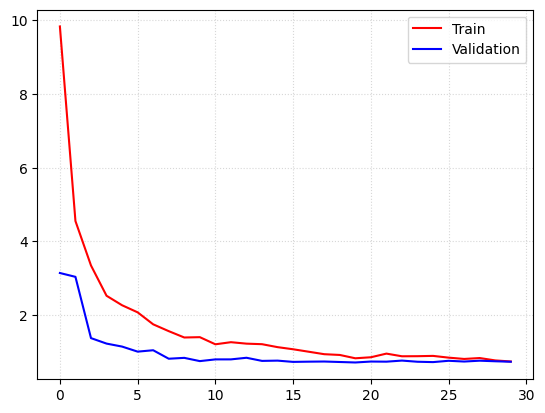

In [46]:
plt.plot(history.history['loss'], c = 'r', label = 'Train')
plt.plot(history.history['val_loss'], c = 'b', label = 'Validation')
plt.legend()
plt.grid(alpha = 0.5, linestyle = ':')
plt.xlabel = 'epochs'
plt.ylabel = 'Loss'
plt.show()

In [49]:
## Sentimental analysis
samples = np.array(['너 오늘 이뻐 보인다',
          '나는 오늘 기분이 더러워',
          '끝내주는데, 좋은 일이 있나봐',
          '나 좋은 일이 생겼어',
          '아 오늘 진짜 짜증나',
          '환상적인데, 정말 좋은거 같아'])

targets =[[1], [0], [1], [1], [0], [1]]

display(samples)
print(targets)

array(['너 오늘 이뻐 보인다', '나는 오늘 기분이 더러워', '끝내주는데, 좋은 일이 있나봐', '나 좋은 일이 생겼어',
       '아 오늘 진짜 짜증나', '환상적인데, 정말 좋은거 같아'], dtype='<U16')

[[1], [0], [1], [1], [0], [1]]


In [51]:
## Tokening
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(samples)

print(tokenizer.word_counts)
print(tokenizer.word_index)

OrderedDict([('너', 1), ('오늘', 3), ('이뻐', 1), ('보인다', 1), ('나는', 1), ('기분이', 1), ('더러워', 1), ('끝내주는데', 1), ('좋은', 2), ('일이', 2), ('있나봐', 1), ('나', 1), ('생겼어', 1), ('아', 1), ('진짜', 1), ('짜증나', 1), ('환상적인데', 1), ('정말', 1), ('좋은거', 1), ('같아', 1)])
{'오늘': 1, '좋은': 2, '일이': 3, '너': 4, '이뻐': 5, '보인다': 6, '나는': 7, '기분이': 8, '더러워': 9, '끝내주는데': 10, '있나봐': 11, '나': 12, '생겼어': 13, '아': 14, '진짜': 15, '짜증나': 16, '환상적인데': 17, '정말': 18, '좋은거': 19, '같아': 20}


In [52]:
sequence = tokenizer.texts_to_sequences(samples)
print(sequence)

[[4, 1, 5, 6], [7, 1, 8, 9], [10, 2, 3, 11], [12, 2, 3, 13], [14, 1, 15, 16], [17, 18, 19, 20]]


In [60]:
input_sequence = np.array(sequence)
targets = np.array(targets)
print(input_sequence)

[[ 4  1  5  6]
 [ 7  1  8  9]
 [10  2  3 11]
 [12  2  3 13]
 [14  1 15 16]
 [17 18 19 20]]


In [66]:
batch_size = 2
num_epochs = 100
word_index = tokenizer.word_index
vocab_size = len(word_index) +1
emb_size = 128
hidden1 = 156
hidden2 = 1

# sentiment_model = keras.Sequential()
# sentiment_model.add(keras.Input(4, )) #4마디로 나눴기 때문에
# sentiment_model.add(keras.layers.Embedding(vocab_size, emb_size))
# sentiment_model.add(keras.layers.Lambda(lambda x: tf.reduce_mean(x, axis =1)))
# sentiment_model.add(keras.layers.Dense(hidden1, 'relu'))
# sentiment_model.add(keras.layers.Dense(hidden2, 'sigmoid'))
inputs = keras.Input(shape = (4, ))
embedding_layer = keras.layers.Embedding(vocab_size, emb_size)(inputs)
mean_emb = tf.reduce_mean(embedding_layer, axis = 1)
dense1 = keras.layers.Dense(hidden1, 'relu')(mean_emb)
outputs = keras.layers.Dense(hidden2, 'sigmoid')(dense1)
sentiment_model_fun = keras.Model(inputs = inputs, outputs = outputs)

sentiment_model_fun.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 4)]               0         
                                                                 
 embedding_4 (Embedding)     (None, 4, 128)            2688      
                                                                 
 tf.math.reduce_mean_1 (TFOp  (None, 128)              0         
 Lambda)                                                         
                                                                 
 dense_36 (Dense)            (None, 156)               20124     
                                                                 
 dense_37 (Dense)            (None, 1)                 157       
                                                                 
Total params: 22,969
Trainable params: 22,969
Non-trainable params: 0
_________________________________________________________

In [63]:
# sentiment_model.compile(loss= 'binary_crossentropy',
#                         optimizer='adam',
#                         metrics = ['acc'])

# history = sentiment_model.fit(input_sequence, targets, epochs= 100, batch_size= batch_size, validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 1s 139ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.6594 - val_acc: 1.0000
Epoch 2/100
2/2 [==============================] - 0s 28ms/step - loss: 7.7098e-04 - acc: 1.0000 - val_loss: 0.6624 - val_acc: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 28ms/step - loss: 5.1810e-04 - acc: 1.0000 - val_loss: 0.6627 - val_acc: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 25ms/step - loss: 3.6567e-04 - acc: 1.0000 - val_loss: 0.6668 - val_acc: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 27ms/step - loss: 2.5376e-04 - acc: 1.0000 - val_loss: 0.6689 - val_acc: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 31ms/step - loss: 1.9451e-04 - acc: 1.0000 - val_loss: 0.6711 - val_acc: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 34ms/step - loss: 1.4977e-04 - acc: 1.0000 - val_loss: 0.6709 - val_acc: 0.5000
Epoch 8/100
2/2 [==============================] - 0s 28ms/step -

In [67]:
## Subclassing

class Sentiment_sub(keras.Model):
    def __init__(self, vocab_size, emb_size, hidden, outputs_node):
        super(Sentiment_sub, self).__init__()
        self.embedding = keras.layers.Embedding(vocab_size, emb_size) 
        self.dense = keras.layers.Dense(hidden, 'relu')
        self.outputs = keras.layers.Dense(outputs_node, 'sigmoid')
        
    def call(self, input):
        x = self.embedding(x)
        x = tf.reduce_mean(x, axis = 1)
        x = self.dense(x)
        x = self.outputs(x)
        
        return(x)
    
sentiment_sub = Sentiment_sub(vocab_size, emb_size, 156, 1)

In [99]:
import sklearn
import pandas as pd
from sklearn import datasets  
print(sklearn.__version__)

1.2.2


In [100]:
iris_dataset = sklearn.datasets.load_iris()
iris_dataset
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [101]:
# print(iris_datatset['data'])
print(iris_dataset['target'])
print(iris_dataset['target_names'])
print(iris_dataset['feature_names']) #각각 column이 의미하는바

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [102]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [103]:
iris = pd.DataFrame(iris_dataset['data'])
iris['target'] = iris_dataset['target']
iris.columns = ['sepal_length','sepal_width','petal)length','petal_width','class']
iris.head()

,sepal_length,sepal_width,petal)length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [104]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler

In [105]:
train_input,test_input,train_target,test_target =train_test_split(
    iris_dataset['data'],iris_dataset['target'],
    test_size =0.2
)

print(train_input.shape)
print(type(train_input),type(train_target))

(120, 4)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [107]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [108]:
from sklearn.neighbors import KNeighborsClassifier

In [109]:
knn = KNeighborsClassifier(n_neighbors=5)

In [111]:
params_knn = {'n_neighbors': range(1,10)}
gs_knn = GridSearchCV(estimator=knn,
                      param_grid=params_knn,
                      scoring='accuracy', cv = 5, verbose=1)
gs_knn.fit(train_scaled, train_target)

print(gs_knn.best_params_)
print(gs_knn.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'n_neighbors': 4}
0.95
